In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [7]:
from random import randrange
import datetime 


def random_date(start,l):
   current = start
   while l >= 0:
      curr = current + datetime.timedelta(minutes=randrange(3600))
      yield curr
      l-=1



startDate = datetime.datetime(2013, 9, 20,13,00)
epoch = datetime.datetime(2013, 1, 1,00,00)

times = [[(x - epoch).total_seconds(), int(1)] for x in random_date(startDate,500)]
X = np.array(times)
print(min(times)[0], max(times)[0])

22683660.0 22899420.0


In [8]:
bandwidth = estimate_bandwidth(X, quantile=0.03)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_ # array of labels which assigns a cluster to each elt of X
cluster_centers = ms.cluster_centers_ # array of all cluster centers

labels_unique = np.unique(labels) # array of labels that designate a cluster
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(labels)
assert len(labels) == len(X)

number of estimated clusters : 34
[ 5 13 28  1 11 14 21 12  9  9 14  0  9  2  5 18  8 12 12  4 26 33  0 18 13
 33 28  4  8 19 27 23 21  3  3  5  7  3 18 27  3  8  1 32 20 18  5  0  3 22
 16  5 23 15  1  8 27 19  8  0  1 32 28 10 11 32 13  4 15  8 23 31  6 13 31
  0 19  7  0  2 17 25  8  7  7  1  2 29  6  6 17 10  6 26 15  1 15 15 15  1
  4  1 16 11 19  0 11  3 19 23 11 18 12 32  0 30 16  8  4 25 26 24 25  9 24
 12 13  3 27  1 10  1 16 27 17  2 26 30 16  7  5 23 11  3 20 21  5  3  6 23
 18 20 33  2  1  8 32 12 11  0  5 29 22  6 19 10 13  0  3 14 10 33 31  3  3
 19  8  5 30 16 16  7  9 12  8 27 18 10  0  0 10 18 16 13 17 11 14  0 24 21
 28 27 13 32 10 14  4  1  8  7 31 17 20  7 11  7 22 26 11  9 10  1 28 32 11
 13 20  1 26  1 14 10  9  2 20 11 22 31 13 26 15 22 13 13  4  5  4 20 10  9
  1 31 18  8 15 31 11  5  3 20  4 30  1 22 22  6  1  1  0 17 11 10 26  7 24
  6 22 12 22 22 24 30 20 14 14  7 13 28 13 10  0  3 26 27  1 21 15  8 20 27
 24 19  1  3 13 30  3 15  3 30 32 13  4  0  8  5 12 21

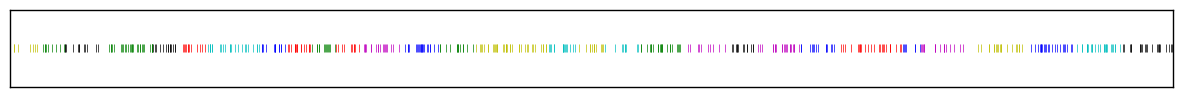

In [16]:
import matplotlib.pyplot as plt
import matplotlib
from itertools import cycle
matplotlib.rcParams['figure.figsize'] = (20, 20)

plt.figure(1, figsize=(15,1))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k # array of booleans for 
    cluster_center = cluster_centers[k]
    clustered = np.sort(X[my_members, 0])
    start, stop = datetime.timedelta(seconds=clustered[0]), datetime.timedelta(seconds=clustered[-1])
    try:
        gap = np.diff(clustered).max()
        gap = datetime.timedelta(seconds=gap)
    except:
        gap = stop-start
    #print("Cluster {} starts at {} and ends at {}".format(k, epoch+start, epoch+stop))
    #print("Duration: {}, comments: {}".format(stop - start, len(clustered)))
    #print("Largest gap: {}".format(gap))
    plt.plot(X[my_members, 0], X[my_members, 1], col + '|')
    axes = plt.gca()
    axes.set_xticklabels([])
    axes.set_xticks([])
    axes.set_yticklabels([])
    axes.set_yticks([])
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #         markeredgecolor='k', markersize=4)
#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [5]:
np.diff(X[:,0]).max()

191400.0

In [6]:
ms.labels_

array([25,  8,  8,  0, 24,  7, 15,  6, 18,  6, 15,  0, 22,  1, 12,  0, 23,
       11,  5, 11,  4,  9, 30, 17, 22, 34, 27, 12, 28, 26,  6,  8, 10,  1,
       32,  7,  2,  3,  4,  2, 13, 21,  1,  2, 19,  3,  3,  5, 25, 19,  7,
       20,  9, 24,  0, 19, 10, 23,  1, 13,  0,  3,  5,  5, 26,  6,  6, 14,
        6, 14, 10,  0,  4,  3, 31,  2,  4, 16,  1,  0, 17, 35, 16, 13, 11,
       33,  5,  2,  1, 14,  4, 21, 15, 16, 20,  9, 18, 17, 12, 29,  4])

In [7]:
cluster_centers


array([[  2.27894914e+07,   1.00000000e+00],
       [  2.27050400e+07,   1.00000000e+00],
       [  2.27816880e+07,   1.00000000e+00],
       [  2.28728040e+07,   1.00000000e+00],
       [  2.28084720e+07,   1.00000000e+00],
       [  2.28851160e+07,   1.00000000e+00],
       [  2.26957920e+07,   1.00000000e+00],
       [  2.27568200e+07,   1.00000000e+00],
       [  2.28244200e+07,   1.00000000e+00],
       [  2.28695400e+07,   1.00000000e+00],
       [  2.27211400e+07,   1.00000000e+00],
       [  2.27949600e+07,   1.00000000e+00],
       [  2.27261800e+07,   1.00000000e+00],
       [  2.27106000e+07,   1.00000000e+00],
       [  2.28424600e+07,   1.00000000e+00],
       [  2.27428200e+07,   1.00000000e+00],
       [  2.27169600e+07,   1.00000000e+00],
       [  2.27749500e+07,   1.00000000e+00],
       [  2.27698200e+07,   1.00000000e+00],
       [  2.28482700e+07,   1.00000000e+00],
       [  2.27000100e+07,   1.00000000e+00],
       [  2.27375400e+07,   1.00000000e+00],
       [  

In [8]:
b = np.array([955920,   956940, 1023240, 1028280, 1044720, 1047660, 1052160,
  1053120, 1073820, 1074060, 1088580, 1089180, 1089600, 1089960,
  1093140, 1105140, 1105380, 1107300, 1119660, 1125600, 1125720,
  1125960, 1126320, 1129380, 1130040, 1131780, 1132320, 1132980,
  1133280, 1133280, 1133640, 1133820, 1133940, 1134960, 1136820,
  1137660, 1138380, 1138680, 1138800, 1139640, 1139820, 1139880,
  1140120, 1140780, 1142340, 1142580, 1142940, 1143180, 1144080,
  1146420, 1147920, 1148640, 1152600, 1155960, 1156620, 1157760,
  1158360, 1159560, 1159800, 1159920, 1160400, 1160460, 1161120,
  1161360, 1162980, 1165320, 1181520, 1187100, 1194840, 1194840,
  1195500, 1209900, 1210860, 1216080, 1216620, 1221540, 1222440,
  1226520, 1227300, 1231440, 1233180, 1235220, 1235820, 1240800,
  1242540, 1247340])

In [9]:
datetime.timedelta(seconds=np.diff(b).max())

TypeError: unsupported type for timedelta seconds component: numpy.int64

In [ ]:
list(enumerate(list('abc'), start=1))

In [101]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [102]:
startDate = datetime.datetime(2013, 9, 20,13,00)
epoch = datetime.datetime(2013, 1, 1,00,00)

times = [(x - epoch).total_seconds() for x in random_date(startDate,100)]
X = np.array(times)
a, b = int(min(times)), int(max(times))

In [103]:
#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
#X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
#                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]
X = X[:, np.newaxis]
X_plot = np.linspace(a, b, 5000)[:, np.newaxis]
bins = np.linspace(a, b, 50)

In [104]:
fig, ax = plt.subplots()
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(X)
log_dens = kde.score_samples(X_plot)
ax.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.show()

In [105]:
log_dens

array([  -7.14349696,  -44.40030027, -156.1707102 , ..., -156.1707102 ,
        -44.40030027,   -7.14349696])

In [108]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [110]:
Z = linkage(X, method='ward', metric='euclidean')
c, _ = cophenet(Z, pdist(X))
print("Cophenetic Correlation Coefficient with {}: {}".format('ward', c))

Cophenetic Correlation Coefficient with ward: 0.7660745582100776


In [111]:
Z

array([[  1.30000000e+01,   6.40000000e+01,   0.00000000e+00,
          2.00000000e+00],
       [  0.00000000e+00,   2.20000000e+01,   6.00000000e+01,
          2.00000000e+00],
       [  4.00000000e+00,   4.00000000e+01,   6.00000000e+01,
          2.00000000e+00],
       [  3.50000000e+01,   6.10000000e+01,   6.00000000e+01,
          2.00000000e+00],
       [  2.00000000e+00,   4.90000000e+01,   1.20000000e+02,
          2.00000000e+00],
       [  5.00000000e+00,   2.80000000e+01,   1.20000000e+02,
          2.00000000e+00],
       [  6.00000000e+00,   2.40000000e+01,   1.20000000e+02,
          2.00000000e+00],
       [  1.90000000e+01,   8.20000000e+01,   1.20000000e+02,
          2.00000000e+00],
       [  5.20000000e+01,   7.90000000e+01,   1.20000000e+02,
          2.00000000e+00],
       [  5.40000000e+01,   9.10000000e+01,   2.40000000e+02,
          2.00000000e+00],
       [  7.70000000e+01,   1.09000000e+02,   2.77128129e+02,
          3.00000000e+00],
       [  8.00000000e

In [112]:
ddata = dendrogram(Z, color_threshold=.07,
                              no_plot=False)